<a href="https://colab.research.google.com/github/IsaacFigNewton/Small-Projects/blob/main/Roulette_Strategy_Simulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd

starting_score = 32
quitting_loss = starting_score/10
prev_bits_to_track = 10
win_prob = 18/37

num_iterations = 1000
longest_test = 1000
custom_delay = 2
custom_growth_rate = 2

# Functions

In [2]:
strategies = {"basic", "martingale", "custom"}

def strategy(bits, score, strat="custom"):
    if strat not in strategies:
        raise ValueError("Invalid strategy")

    quit = False
    bet = 1
    delay = 1
    growth_rate = 2

    if strat == "basic":
      bet = 1
    elif strat == "martingale":
      bet = 1
      delay = 0
    elif strat == "custom":
      bet = 1
      delay = custom_delay
      growth_rate = custom_growth_rate

    offset = len(bits) - delay - 2

    # quit if the final bet with the basic strat falls below 10% of the original
    if strat == "basic":
      if score < quitting_loss:
          # print("Max sequence of losses reached")
          quit = True

    # if it's a progressive betting strategy
    elif offset >= 0:
      # stop if the max sequence of losses has been reached
      if score < quitting_loss:#\
              # or (len(bits) == prev_bits_to_track\
              #     and all(item == 0 for item in bits)):
          # print("Max sequence of losses reached")
          quit = True

      # for each loss after the first 1-2, double the magnitude of the loss
      for i in range(offset, 0, -1):
          if bits[i] == 0:
              bet *= growth_rate
          else:
              break

    # assume bet
    if bits[-1] == 1:
      score += bet
    else:
      score -= bet

    return score, quit

In [3]:
# Generate bits and score
def generate_bits_and_score(strat="custom"):
    bits = []
    score = starting_score
    score_history = []
    zero_count = 0

    while score > 0:
        bit = 1 if random.random() < (win_prob) else 0
        bits.append(bit)

        # keep a queue of the bits
        if len(bits) > prev_bits_to_track:
            bits.pop(0)

        score, quit = strategy(bits, score, strat)
        score_history.append(score)

        if score <= 0 or quit or len(score_history) >= longest_test:
            # print("Quitting
            # print("Game over man, GAME OVER")
            break

    return score_history

# Run Tests

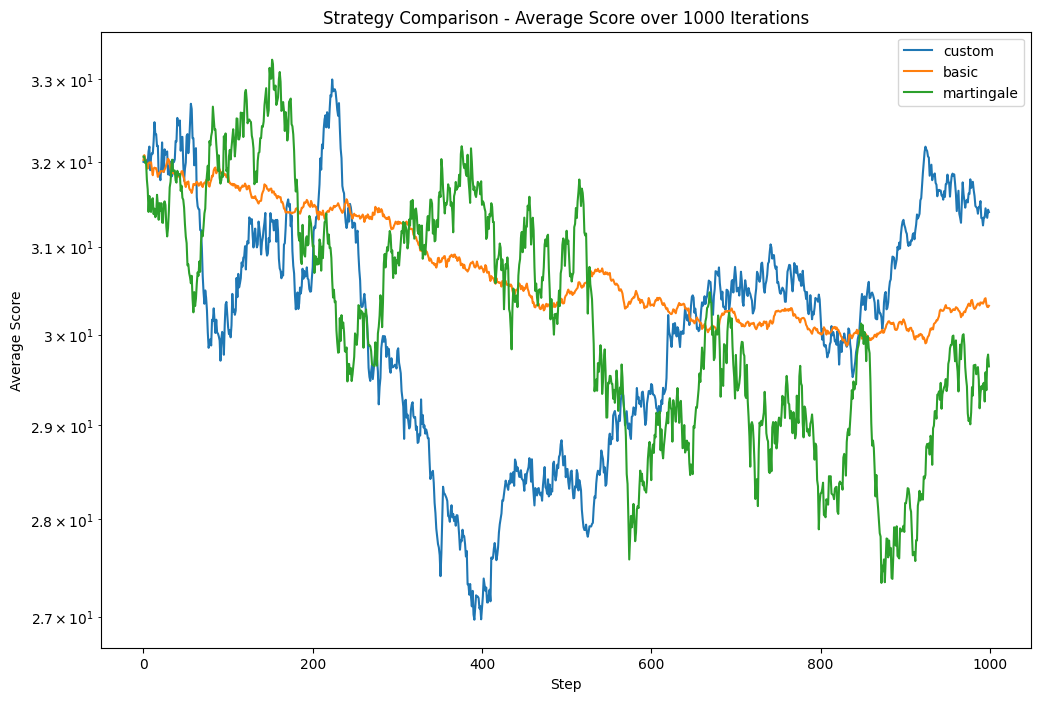

In [4]:
results = {}
longest_sequence = 0

for strat in strategies:
    all_scores = []

    # Run the strategy multiple times
    for _ in range(num_iterations):
        score_history = generate_bits_and_score(strat)
        all_scores.append(score_history)

        if len(score_history) > longest_sequence:
            longest_sequence = len(score_history)

    # Normalize lengths by padding with zeros
    for i in range(num_iterations):
        last_score = all_scores[i][-1]
        all_scores[i] += [last_score] * (longest_sequence - len(all_scores[i]))

    # Calculate average scores
    avg_scores = [sum(scores) / num_iterations for scores in zip(*all_scores)]
    results[strat] = avg_scores

# Normalize lengths by padding with zeros
for strat in strategies:
    last_score = results[strat][-1]
    results[strat] += [last_score] * (longest_sequence - len(results[strat]))

# Consolidate results in a pandas DataFrame
df = pd.DataFrame(results)
df['step'] = df.index




# Plot the results
plt.figure(figsize=(12, 8))
for strat in strategies:
    plt.plot(df['step'], df[strat], label=strat)

plt.xlabel('Step')
plt.ylabel('Average Score')
plt.yscale('log')
plt.title(f'Strategy Comparison - Average Score over {num_iterations} Iterations')
plt.legend()
plt.show()